In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import date

In [3]:
data_diam = pd.read_csv(r'C:\Users\iahma\OneDrive\Desktop\ml_project1_data.csv')

In [4]:
data_diam.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,2012-11-13,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,2013-05-08,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,2013-06-06,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,2014-03-13,68,28,...,20,1,0,0,0,0,0,3,11,0


In [6]:
# Turn date of customer enrollemnt to days of enrollemnt 
data_diam['days_of_enrollment'] = 0
data_diam['date_of_enrollment'] = 0
data_diam['date_of_enrollment'] = pd.to_datetime(data_diam['Dt_Customer'])
data_diam['days_of_enrollment'] = max(data_diam['date_of_enrollment']) - data_diam['date_of_enrollment']
data_diam['days_of_enrollment'] = data_diam['days_of_enrollment'].astype('timedelta64[D]')

# Turn YOB to age
data_diam['Year_Birth'] = pd.to_numeric(data_diam['Year_Birth'], errors='raise')
data_diam['age'] = 0
data_diam['age'] = max(data_diam.date_of_enrollment.dt.year) - data_diam['Year_Birth']

# Replace boolean data for Yes/No
data_diam[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Complain','Response']] = data_diam[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Complain','Response']].replace(0,'No')
data_diam[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Complain','Response']] = data_diam[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Complain','Response']].replace(1,'Yes')

# Drop irrelevant fields
data_diam.drop(['Z_CostContact', 'Z_Revenue'], axis=1, inplace = True)

# Explore missing values
count_na_ad_id = data_diam.isnull().sum()
print(count_na_ad_id)
data_diam_m = data_diam[data_diam['Income'].isna()]

# Drop the 24 records containing missing values
#data_diam.dropna(axis =0, inplace = True)

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
days_of_enrollment      0
date_of_enrollment      0
age                     0
dtype: int64


In [7]:
# Replace the missing value in income with the average for each educational group
temp = data_diam.groupby(['Education'])['Income'].mean()
data_diam.loc[(data_diam['Education'] == "2n Cycle")&(data_diam['Income'].isna()), 'Income'] = temp['2n Cycle']
data_diam.loc[(data_diam['Education'] == "Basic")&(data_diam['Income'].isna()), 'Income'] = temp['Basic']
data_diam.loc[(data_diam['Education'] == "Graduation")&(data_diam['Income'].isna()), 'Income'] = temp['Graduation']
data_diam.loc[(data_diam['Education'] == "Master")&(data_diam['Income'].isna()), 'Income'] = temp['Master']
data_diam.loc[(data_diam['Education'] == "PhD")&(data_diam['Income'].isna()), 'Income'] = temp['PhD']
print(temp)

Education
2n Cycle      47633.190000
Basic         20306.259259
Graduation    52720.373656
Master        52917.534247
PhD           56145.313929
Name: Income, dtype: float64


In [8]:
count_na_ad_id = data_diam.isnull().sum()
print(count_na_ad_id)

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
days_of_enrollment     0
date_of_enrollment     0
age                    0
dtype: int64


In [9]:
# Data cleaning

#explore the available education levels
data_diam['Education'].unique()

#explore the available marital status 
data_diam['Marital_Status'].unique()

#Code the answers ('Alone','Absurd', 'YOLO') into "Single"
data_diam.loc[data_diam['Marital_Status'] == 'Alone', 'Marital_Status'] = 'Single'
data_diam.loc[data_diam['Marital_Status'] == 'Absurd', 'Marital_Status'] = 'Single'
data_diam.loc[data_diam['Marital_Status'] == 'YOLO' , 'Marital_Status'] = 'Single'

#explore the age distribution of the sample
data_diam['age'] = pd.to_numeric(data_diam['age'], errors='coerce')
data_diam.agg({'age' : ['max', 'min','mean']})
data_diam['age'].nlargest(n=10)
data_diam['age'].nsmallest(n=10)

#exclude all records with age greater than 100

data_diam.drop(data_diam[data_diam['age'] > 100].index, inplace = True)

Text(0.5, 1.0, 'Educational level distribution')

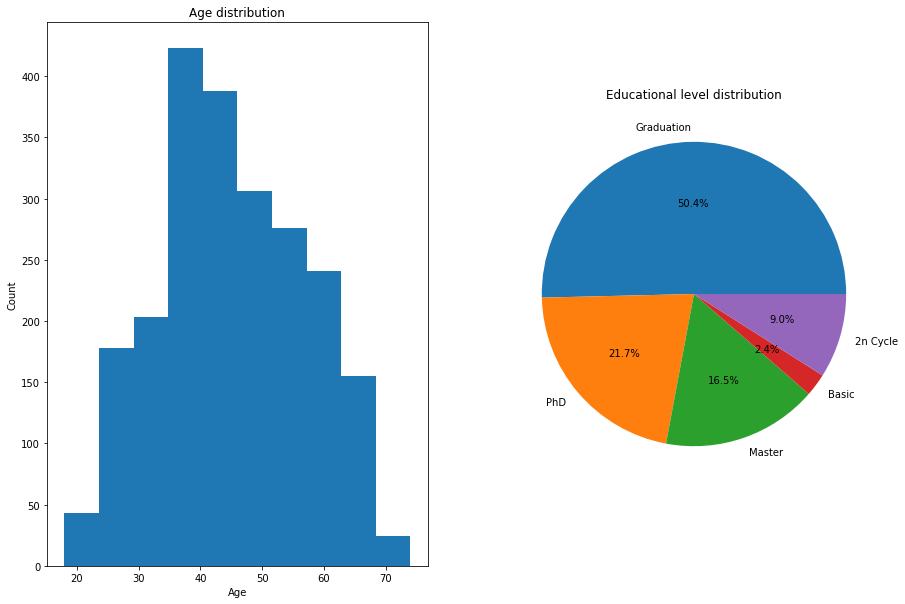

In [10]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,10))

#Samples' age distribution
counts, bins = np.histogram(data_diam['age'])
ax1.hist(bins[:-1], bins, weights=counts)
ax1.set_xlabel('Age')
ax1.set_ylabel('Count')
ax1.set_title('Age distribution')

#Samples' education level

labels = data_diam['Education'].unique()
sizes = [sum(data_diam['Education'] == 'Graduation'), sum(data_diam['Education'] == 'PhD')
        ,sum(data_diam['Education'] == 'Master'), sum(data_diam['Education'] == 'Basic'), sum(data_diam['Education'] == '2n Cycle')]
ax2.pie(sizes, labels=labels, autopct='%1.1f%%')
ax2.set_title('Educational level distribution')


Text(0.5, 1.0, 'Amount of spending on gold products in the past 2 years')

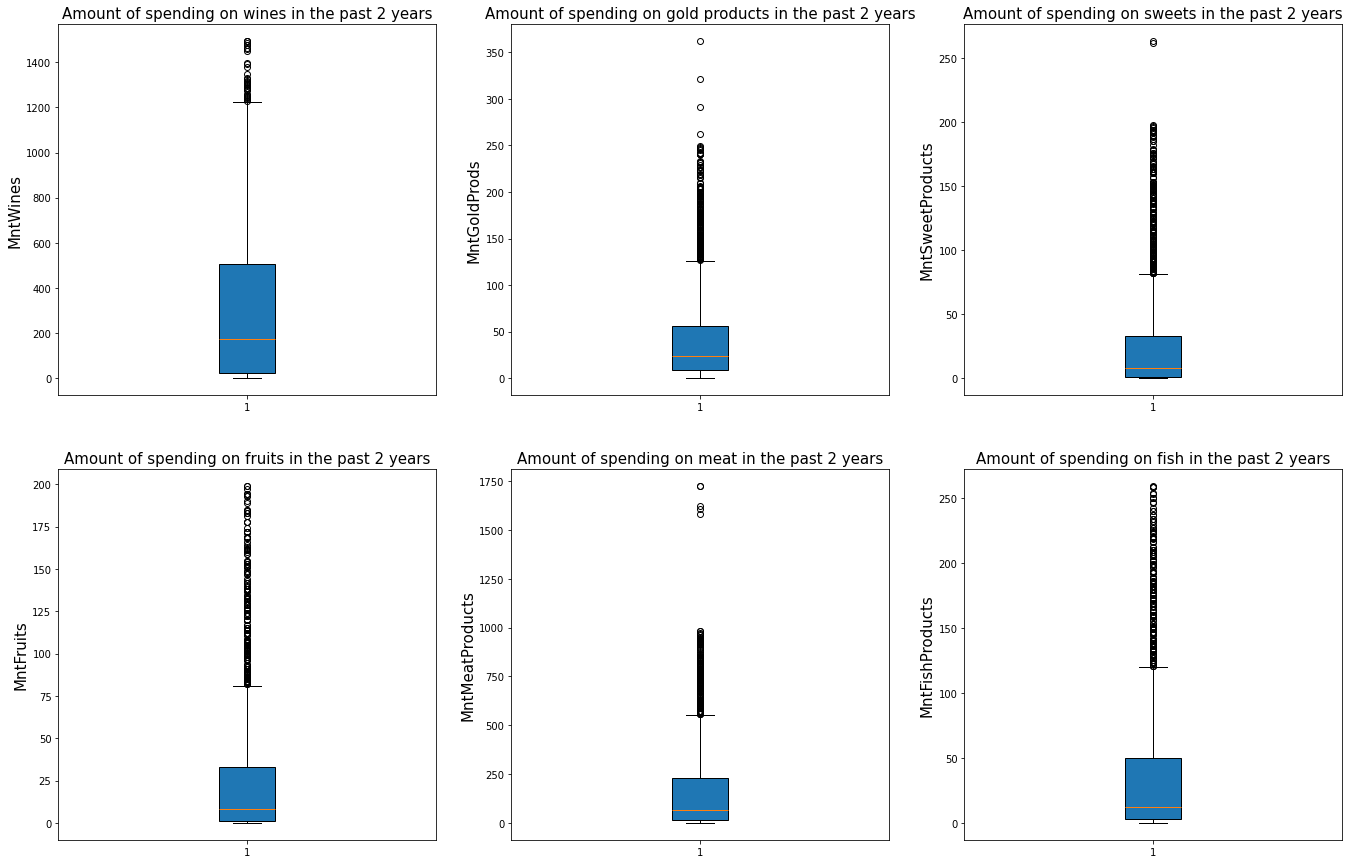

In [52]:
#Explore the spending distribution on various products
fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize = (23,15))

bplot = axs[0,0].boxplot(data_diam['MntWines'],
                     vert=True,
                     patch_artist=True)
axs[0,0].set_ylabel('MntWines', fontsize=15)
axs[0,0].set_title('Amount of spending on wines in the past 2 years', fontsize=15)

bplot = axs[1,0].boxplot(data_diam['MntFruits'],
                     vert=True,
                     patch_artist=True)
axs[1,0].set_ylabel('MntFruits', fontsize=15)
axs[1,0].set_title('Amount of spending on fruits in the past 2 years', fontsize=15)

bplot = axs[1,1].boxplot(data_diam['MntMeatProducts'],
                     vert=True,
                     patch_artist=True)
axs[1,1].set_ylabel('MntMeatProducts', fontsize=15)
axs[1,1].set_title('Amount of spending on meat in the past 2 years', fontsize=15)

bplot = axs[1,2].boxplot(data_diam['MntFishProducts'],
                     vert=True,
                     patch_artist=True)
axs[1,2].set_ylabel('MntFishProducts', fontsize=15)
axs[1,2].set_title('Amount of spending on fish in the past 2 years', fontsize=15)

bplot = axs[0,2].boxplot(data_diam['MntSweetProducts'],
                     vert=True,
                     patch_artist=True)
axs[0,2].set_ylabel('MntSweetProducts', fontsize=15)
axs[0,2].set_title('Amount of spending on sweets in the past 2 years', fontsize=15)

bplot = axs[0,1].boxplot(data_diam['MntGoldProds'],
                     vert=True,
                     patch_artist=True)
axs[0,1].set_ylabel('MntGoldProds', fontsize=15)
axs[0,1].set_title('Amount of spending on gold products in the past 2 years', fontsize=15)

Text(0.5, 1.0, 'Number of web visits in the past 2 years')

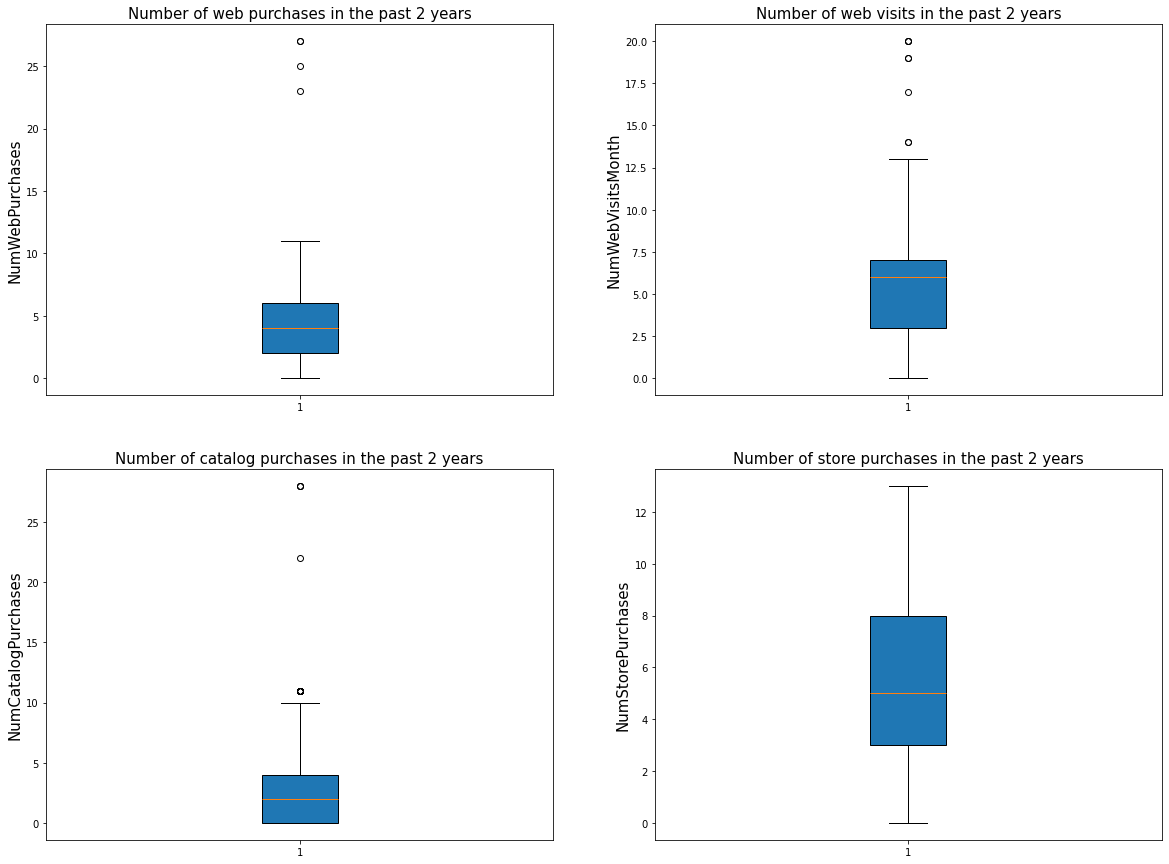

In [53]:
#Explore the purchasing habits
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize = (20,15))

bplot = axs[0,0].boxplot(data_diam['NumWebPurchases'],
                     vert=True,
                     patch_artist=True)
axs[0,0].set_ylabel('NumWebPurchases', fontsize=15)
axs[0,0].set_title('Number of web purchases in the past 2 years', fontsize=15)

bplot = axs[1,0].boxplot(data_diam['NumCatalogPurchases'],
                     vert=True,
                     patch_artist=True)
axs[1,0].set_ylabel('NumCatalogPurchases', fontsize=15)
axs[1,0].set_title('Number of catalog purchases in the past 2 years', fontsize=15)

bplot = axs[1,1].boxplot(data_diam['NumStorePurchases'],
                     vert=True,
                     patch_artist=True)
axs[1,1].set_ylabel('NumStorePurchases', fontsize=15)
axs[1,1].set_title('Number of store purchases in the past 2 years', fontsize=15)

bplot = axs[0,1].boxplot(data_diam['NumWebVisitsMonth'],
                     vert=True,
                     patch_artist=True)
axs[0,1].set_ylabel('NumWebVisitsMonth', fontsize=15)
axs[0,1].set_title('Number of web visits in the past 2 years', fontsize=15)

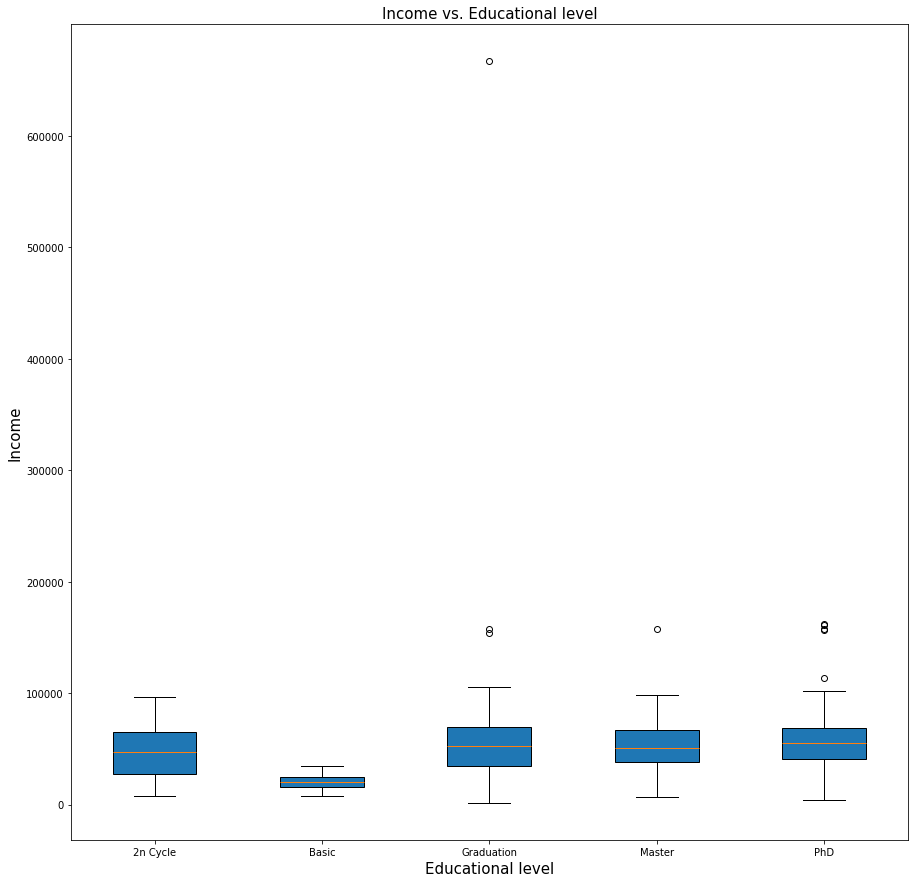

In [54]:
fig, ax1 = plt.subplots(nrows = 1, ncols = 1, figsize = (15,15))
temp1 = data_diam.groupby(['Education'])['Income'].apply(list)
bplot = ax1.boxplot(temp1, labels = temp1.index,
                     vert=True,
                     patch_artist=True)
ax1.set_xlabel('Educational level', fontsize=15)
ax1.set_ylabel('Income', fontsize=15)
ax1.set_title('Income vs. Educational level', fontsize=15)
plt.show()

In [55]:
# exclude all records with income greater than 200000 
# and web purchases/ catalog purchases higher than 20

data_diam.drop(data_diam[data_diam['Income'] > 200000].index, inplace = True)
data_diam.drop(data_diam[data_diam['NumWebPurchases'] > 20].index, inplace = True)
data_diam.drop(data_diam[data_diam['NumCatalogPurchases'] > 20].index, inplace = True)

Text(0.5, 1.0, 'Recency Vs. Days of enrollemnt')

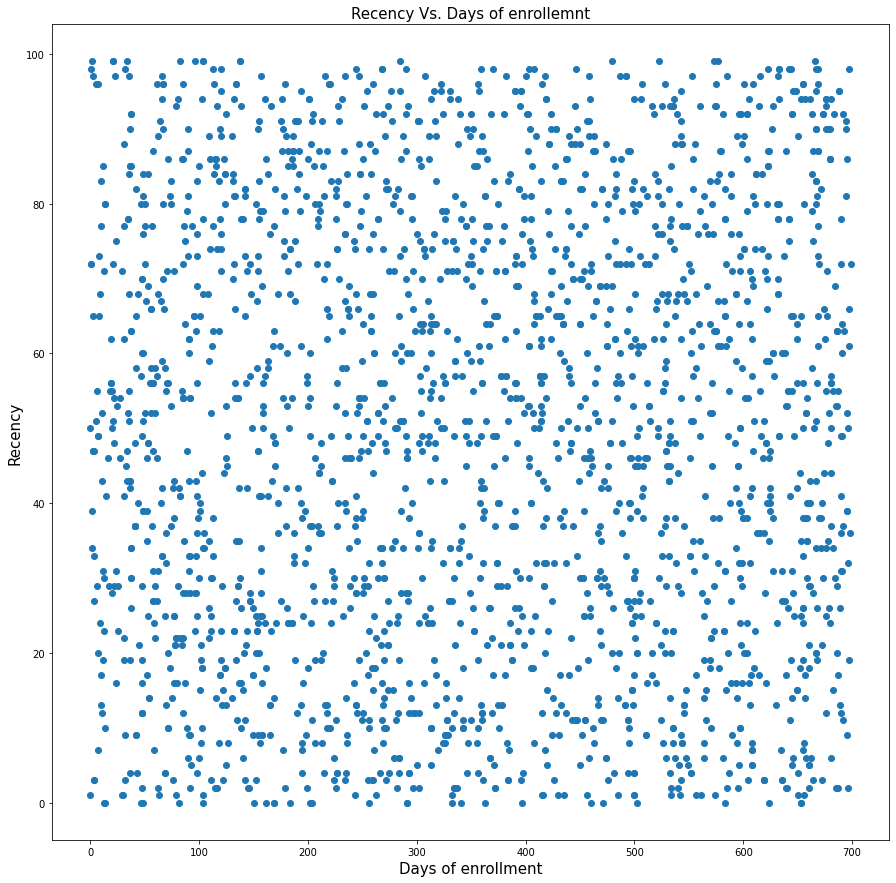

In [56]:
fig, ax1 = plt.subplots(nrows = 1, ncols = 1, figsize = (15,15))
bplot = ax1.scatter(data_diam['days_of_enrollment'],data_diam['Recency'])
ax1.set_xlabel('Days of enrollment', fontsize=15)
ax1.set_ylabel('Recency', fontsize=15)
ax1.set_title('Recency Vs. Days of enrollemnt', fontsize=15)
#ax1.legend()
#ax1.grid(True)

Text(0.5, 1.0, 'Recency Vs. NumWebVisitsMonth')

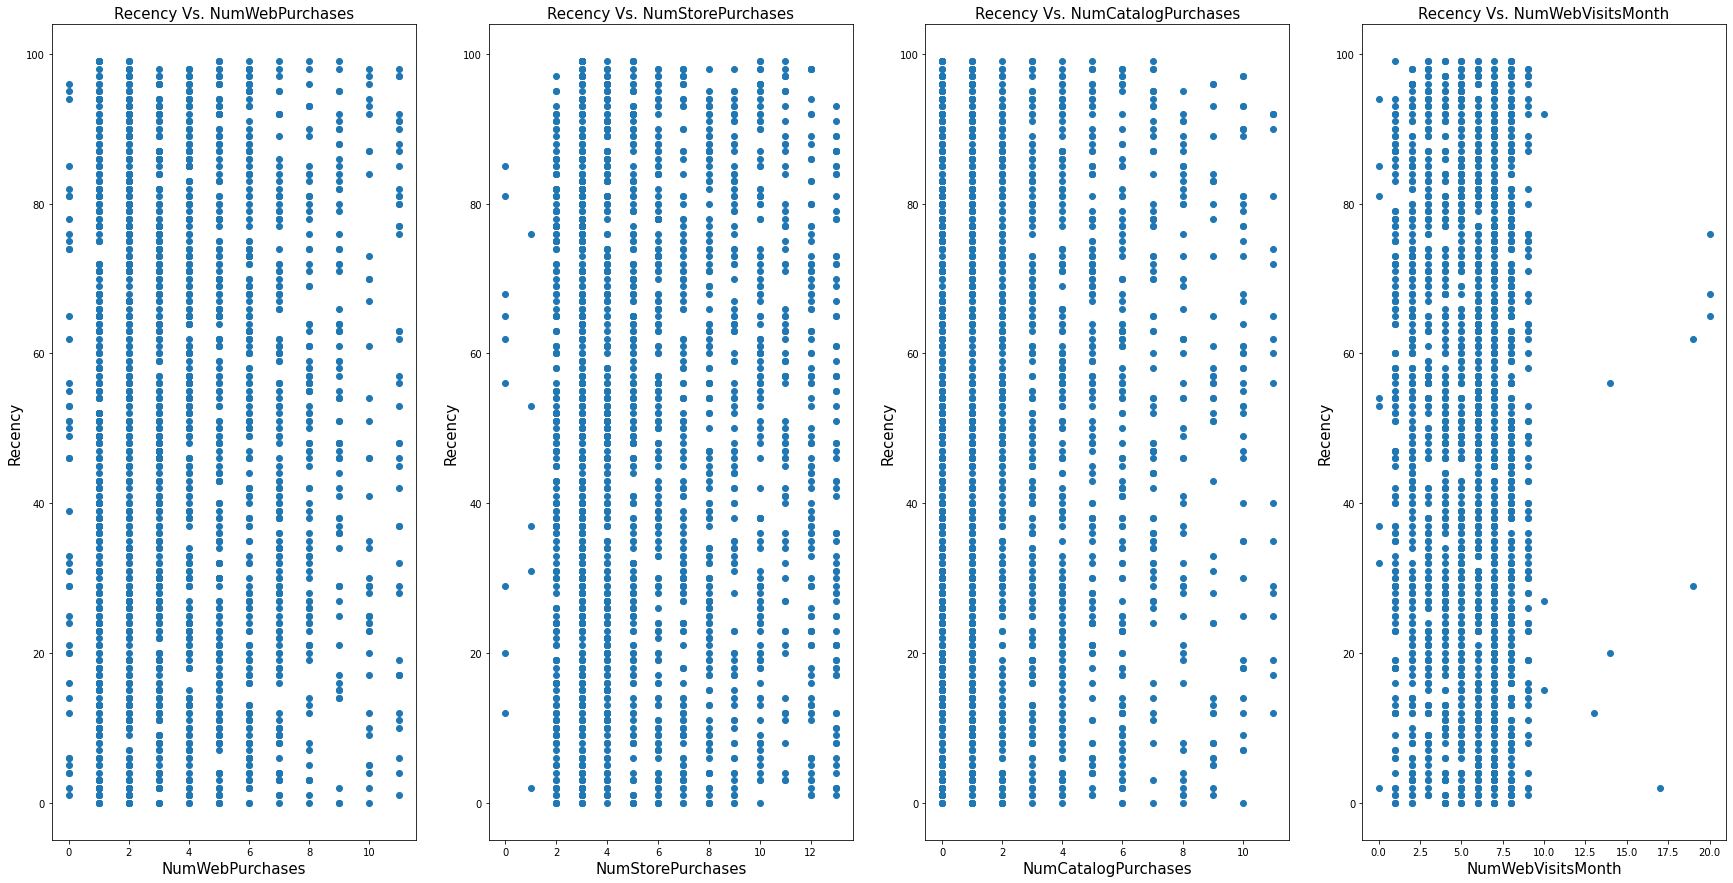

In [57]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows = 1, ncols = 4, figsize = (30,15))
bplot = ax1.scatter(data_diam['NumWebPurchases'],data_diam['Recency'])
ax1.set_xlabel('NumWebPurchases', fontsize=15)
ax1.set_ylabel('Recency', fontsize=15)
ax1.set_title('Recency Vs. NumWebPurchases', fontsize=15)

bplot = ax2.scatter(data_diam['NumStorePurchases'],data_diam['Recency'])
ax2.set_xlabel('NumStorePurchases', fontsize=15)
ax2.set_ylabel('Recency', fontsize=15)
ax2.set_title('Recency Vs. NumStorePurchases', fontsize=15)

bplot = ax3.scatter(data_diam['NumCatalogPurchases'],data_diam['Recency'])
ax3.set_xlabel('NumCatalogPurchases', fontsize=15)
ax3.set_ylabel('Recency', fontsize=15)
ax3.set_title('Recency Vs. NumCatalogPurchases', fontsize=15)

bplot = ax4.scatter(data_diam['NumWebVisitsMonth'],data_diam['Recency'])
ax4.set_xlabel('NumWebVisitsMonth', fontsize=15)
ax4.set_ylabel('Recency', fontsize=15)
ax4.set_title('Recency Vs. NumWebVisitsMonth', fontsize=15)

In [58]:
# Compute the correlation matrix of the spending habits variables

data_diam_c = data_diam[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']].copy()
data_diam_c.corr(method='pearson')

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
MntWines,1.000000,0.387474,0.595960,0.397877,0.395540,0.399331
MntFruits,0.387474,1.000000,0.571393,0.593896,0.578432,0.401810
MntMeatProducts,0.595960,0.571393,1.000000,0.598873,0.565180,0.386319
MntFishProducts,0.397877,0.593896,0.598873,1.000000,0.591196,0.434753
MntSweetProducts,0.395540,0.578432,0.565180,0.591196,1.000000,0.370335
MntGoldProds,0.399331,0.401810,0.386319,0.434753,0.370335,1.000000


In [59]:
# Compute the correlation matrix of the shopping habits variables

data_diam_c = data_diam[['NumWebPurchases','NumCatalogPurchases','NumStorePurchases']].copy()
data_diam_c.corr(method='pearson')

,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
NumWebPurchases,1.000000,0.464952,0.555911
NumCatalogPurchases,0.464952,1.000000,0.580495
NumStorePurchases,0.555911,0.580495,1.000000


In [60]:
# Compute the correlation matrix of the shopping habits variables and approximated total
# total value of purchases

data_diam_c = data_diam[['NumWebPurchases','NumCatalogPurchases','NumStorePurchases',
                        'MntWines','MntFruits','MntMeatProducts','MntFishProducts',
                         'MntSweetProducts','MntGoldProds']].copy()
data_diam_c['tot_value_of_pur'] = data_diam_c['MntWines']*2 + data_diam_c['MntFruits']*2 + data_diam_c['MntMeatProducts']*1.3 + data_diam_c['MntSweetProducts']*0.9 + data_diam_c['MntGoldProds']*30
data_diam_c.drop(columns=['MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'], inplace = True)
data_diam_c.corr(method='pearson')

,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,tot_value_of_pur
NumWebPurchases,1.000000,0.464952,0.555911,0.538155
NumCatalogPurchases,0.464952,1.000000,0.580495,0.697132
NumStorePurchases,0.555911,0.580495,1.000000,0.588332
tot_value_of_pur,0.538155,0.697132,0.588332,1.000000


In [61]:
types = data_diam.dtypes
print(types)

ID                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer                    object
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                   object
AcceptedCmp4                   object
AcceptedCmp5                   object
AcceptedCmp1                   object
AcceptedCmp2                   object
Complain                       object
Response    

In [62]:
# Drop unnesccary variables and export data to clustering
culustering_data = data_diam.drop(['Year_Birth', 'Recency', 'date_of_enrollment'], axis =1, inplace= False)
culustering_data.to_csv(r'C:\Users\iahma\OneDrive\Desktop\clustering_data.csv',index = False)